In [13]:
from pycocotools.coco import COCO
from PIL import Image
import os

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
json = './data/annotations/captions_train2014.json'

In [3]:
coco = COCO(json)

loading annotations into memory...
Done (t=0.92s)
creating index...
index created!


In [4]:
ids = list(coco.anns.keys())

In [5]:
ann_id = ids[45]
caption = coco.anns[ann_id]['caption']
img_id = coco.anns[ann_id]['image_id']
path = coco.loadImgs(img_id)[0]['file_name']

In [11]:
image = Image.open(os.path.join('./data/train2014', path)).convert('RGB')

A skinny horse is grazing in a field.


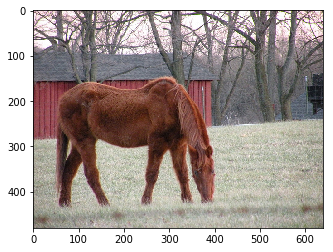

In [14]:
print(caption)
imshow(image)

## 自定义函数Load数据

In [23]:
image_path = './data/train2014'
json_file = './data/annotations/captions_train2014.json'

import json

COCO API处理 annotations 有一个共性，都是使用某个信息的唯一的id作为临时存储字典的key，value则是对应的原封不动的信息。  
比如下面的anns是以caption的id为key的，imgs是以image的id为key的，其余信息都是不变的，这样可以很方便的依据ID找到信息。

In [40]:
def anno_loader(file):
    """
    use to load coco caption annotations
    :param json_file: annotation file abspath
    :return: anns, a dict,
        the key is the caption id and the value is annotation,
        each annotation also a dict with three keys: 'caption', 'id', 'image_id'
    """
    dataset = json.load(open(file, 'r'))
    anns = {}
    if 'annotations' in dataset:
        for ann in dataset['annotations']:
            anns[ann['id']] = ann
            
    imgs = {}
    if 'images' in dataset:
        for img in dataset['images']:
            imgs[img['id']] = img
    return anns, imgs

In [32]:
anns, imgs = anno_loader(json_file)
ids = list(anns.keys())

In [41]:
ann_id = ids[45]
caption = anns[ann_id]['caption']
img_id = anns[ann_id]['image_id'] 

In [47]:
img_name = imgs[img_id]['file_name']
img_file = os.path.join('./data/train2014', img_name)

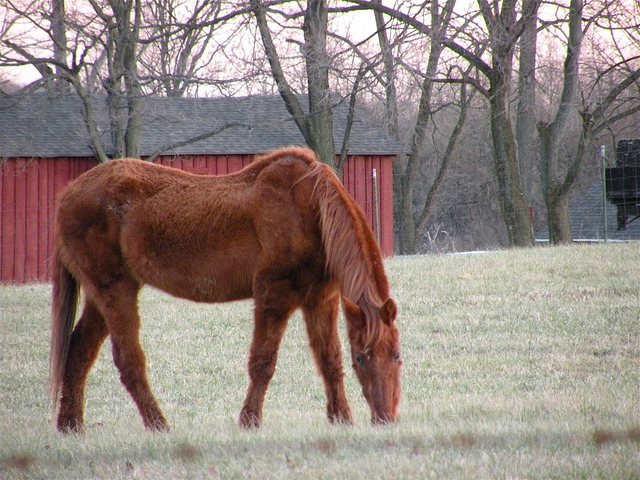

In [49]:
Image.open(img_file)